<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/4_CNN_%ED%95%98%EB%82%98%EC%94%A9_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0_(2)_3_Channel_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4-1. 들어가며

안녕하세요!

CNN 하나씩 이해하기 위해 오신 여러분들 환영합니다~ 🤗

오늘 학습할 내용은 3개의 channel이 있을 때 , channel 값이 3개보다 더 많을 때 Convolution 연산이 어떻게 이뤄지는지를 확인해 보는 시간을 가져봅시다. 본격적인 학습에 앞서 간단한 아이스브레이킹 퀴즈를 풀어 볼까요?

[아이스브레이킹] 우리가 일반적으로 접할 수 있는 color 이미지는 3개의 channel로 이루어져 있습니다. 빛의 3원색인 RGB(Red, Green, Blue)의 값의 정도를 합쳐서 하나의 시각적 이미지 데이터를 표현한다고 생각하면 됩니다. RGB 색상으로 보라색을 표현하려면 어떻게 표현할 수 있을지 생각해 보세요.


보라색은 Red와 Blue 색상을 섞어서 표현할 수 있을 것 같습니다. 보라색의 밝기에 따라서 조금 달라지겠지만 진한 보라색을 RGB 색상으로 표현하면 (148, 0, 211)로 나타낼 수 있습니다.

보라색 외에도 여러분이 만들어 보고 싶은 색상을 RGB 색상으로 나타내 봅시다!

## 학습 내용
4-2. Channel이 3개일 때, 1-Layer의 Convolution 연산
- Channel이 3개일 때, Convolution 연산 방식을 이해하고 Channel이 1개 일 때와 다른 부분을 이해하고 feature map의 크기를 직접 구해봅시다.

4-3. Hyper-Parameter에 대한 고민 (Kernel size, Channel size, Stride)
- Convolution 연산을 할 때, Hyper-Parameter(kernel size, channel size, stride)에 대한 고민을 각 개념에 대입해 생각해 봅시다.

4-4. 1x1 Convolution
- 1x1 Convolution의 특징과 사용했을 때의 장점에 대해서 알아봅시다.
4-5. Transposed Convolution
- Transposed Convolution에 대해서 알아보고 직접 손으로 연산을 해보며, Convolution 연산과의 차이점을 알아봅시다.
## 학습 목표
- 3 Channel 일 때 Convolution 연산 방식을 설명할 수 있습니다.
- Convolution 연산의 결과로 나온 feature map의 차원을 계산할 수 있습니다.

### 4-2. Channel이 3개일 때, 1-Layer의 Convolution 연산

Q. 7 x 7 x 3의 input에 3x3의 kernel, stride 1인 Convolution 연산을 하면 output의 크기는 어떻게 되나요? feature map의 크기는 어떻게 되나요? (연산과정을 찬찬히 생각하면서 작성해 보세요. ☺️)

kernel은 input의 channel 수만큼 존재하고, 각 channel 수준에서 Convolution 2D 연산을 계속하면 channel 수만큼의 output이 생깁니다. 따라서 output은 5 x 5 x 3이 나옵니다.

filter 1개로 feature map 1개를 만들 수 있습니다. 3개의 output의 동일한 위치의 숫자를 더하고 거기에 1번 filter의 bias를 더하여 1번 filter의 5 x 5 feature map을 만들 수 있습니다. 즉 “(5 x 5) x 3”개의 칸에 같은 값(bias)이 더해져 feature map을 만듭니다.

Q. filter마다 위의 연산과정을 반복하게 됩니다. filter은 어떤 역할을 하고 filter가 많으면 어떻게 되는지 설명해 보세요.

filter는 feature extractor입니다. 이미지 데이터가 가지고 있는 특징, pattern을 추출해 주는 역할을 합니다. filter가 많을수록 여러 개의 feature map이 생기며 복잡하고 다양한 pattern을 찾을 수 있습니다.

Q. input의 channel 수, feature map의 channel 수, filter의 개수의 관계에 대해서 설명해 보세요.

input의 channel 수와 feature map의 channel 수는 다르지만, filter의 개수와 feature map의 channel 수는 같습니다. (feature map은 activation map이라고도 많이 씁니다.)

### 4-3. Hyper-Parameter에 대한 고민 (Kernel size, Channel size, Stride)

Convolution 연산을 할 때, Hyper-Parameter에 대한 고민을 해야 합니다. 이번 스텝에서는 kernel size, channel size, stride에 대해 고민해 봅시다.


### Kernel Size
- Kernel size가 커질수록 연산을 통해 찾아야 하는 파라미터의 수가 증가하게 됩니다.
- Kernel size가 작아질수록 데이터에 존재하는 global feature보다 local feature에 집중하게 됩니다. 쉽게 표현하자면 큼직한 특징보다는 지엽적인 특징에 집중해서 패턴을 찾게 됩니다.

### Channel size
- Filter의 channel size가 커질수록 convolution 연산을 통해서 더 다양한 패턴을 찾을 수 있습니다.
- 그러나 channel의 사이즈가 커짐에 따라서 연산으로 찾아야 하는 파라미터의 숫자가 증가하게 됩니다.


###  Stride
- Stride 값이 커지면 데이터를 빠르게 훑고 지나가는 연산을 하게 됩니다.
- 따라서 지역적인 특징을 꼼꼼하게 살펴보아야 할 경우에는 stride값을 크게 하는 것이 좋지 않습니다.


안타깝게도 이러한 hyperparameter의 값을 어떻게 정하는 것이 최적이라는 규칙을 찾는 것은 매우 어려운 일입니다. 따라서 연구자는 시행착오를 스스로의 실습으로 해거나 AutoML과 같은 방법으로 hyperparameter를 스스로 tuning해야 합니다.

> AutoML은 머신러닝과 딥러닝을 적용할 때마다 반복적인 과정으로 발생하는 비효율적인 작업(하이퍼 파라미터 실험, 문제 적합한 architecture를 찾는 과정 등)을 최대한 자동화하여 생산성과 효율을 높이기 위하여 등장한 것으로, 현재 다양한 툴들이 개발되어 있습니다.

일반적으로 해당 task에서 가장 좋은 성능을 보여주는 모델의 hyperparameter를 그대로 따라하는 경우가 많습니다.

Q. Convolution 연산을 할 때와 모델을 학습할 때에는 다양한 hyperparameter의 값을 정해야 합니다. hyperparameter와 많이 혼용해서 사용되는 개념인 매개변수 parameter에 대해서 알아봅시다. 각각의 개념을 찾아보고 두 개념의 차이점에 대해서 설명해 보세요.

파라미터와 하이퍼파라미터 모두 매개변수(parameter)이지만, 두 개념은 차이점이 있습니다.

• 파라미터 (Parameter) : 파라미터는 모델 내부에서 학습되는 변수입니다.
예) weight coefficient(가중치 계수), bias(편향치)
• 하이퍼파라미터 (Hyperparameter) : 하이퍼 파라미터는 사용자가 직접 세팅해 주는 값을 말합니다.
예) learning rate, batch size 등

## 4-4. 1x1 Convolution

Convolution 학습을 수행하는 layer를 사용해서 원하는 모델을 구성할 때는 Filter의 Channel 수를 직접 결정해야 합니다. 이전에 언급한 대로, 일반적으로는 좋은 성능을 보이는 논문에서의 구조를 그대로 따라하지만, 때로는 연구자가 직접 결정해주어야 합니다.

channel size가 지나치게 크면 학습을 통해 찾아야 하는 파라미터 숫자가 증가하기 때문에 많은 연산 비용을 들여야만 합니다. 하지만 1x1 Convolution을 사용하면 연산량을 매우 쉽게 줄일 수 있습니다.

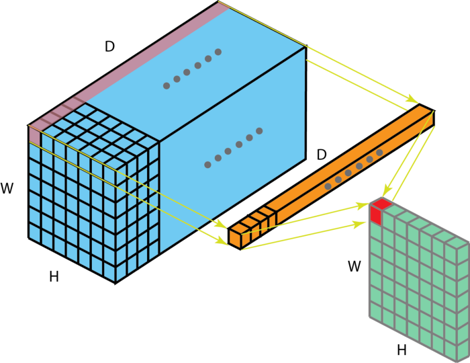

때로는 feature map의 가로 세로 사이즈는 변화시키지 않고 channel size만 변형하고 싶을 때가 있습니다. 물론 padding을 통하여 가로 세로 사이즈에 대한 변경없이 channel size만 변경할 수 있지만 파라미터 숫자 증가에 따른 연산량 증가의 문제를 피할 수 없습니다. 이럴 때 1x1 convolution은 연산량의 문제를 회피하면서도 channel size를 원하는 대로 변경하는 데에 도움을 줍니다.

Q. 1x1 Convolution을 사용하면 연산량을 매우 쉽게 줄일 수 있습니다. 계산량이 실제로 줄어드는지 예시 2개를 풀어보고, 두 개의 값을 비교하여 생각해 보세요.

[예시 1] 28x28x192 image 데이터에 (5x5 filter, 32 channel) convolution 연산을 적용한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.
[예시 2] 28x28x192 image 데이터에 (1x1 filter, 16 channel) convolution 연산을 사용하여 channel을 줄인 뒤, 이어서 (5x5 filter, 32 channel) convolution 연산을 적용 한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.




예시 1의 feature map의 크기는 24x24x32가 나옵니다. 파라미터 수(연산량)는 28 x 28 x 32 x 5 x 5 x 192 = 120,422,400 약 1.2억 번의 연산이 필요합니다.

예시 2의 feature map의 크기도 24x24x32가 나옵니다. 먼저, 1x1 filter를 사용해서 크기를 줄일 때 사용되는 파라미터 수(연산량)는 28 x 28 x 16 x 1 x 1 x 192 = 2,408,448 약 240만 번의 연산이 필요합니다. 다시 5x5 filter를 사용하면 28 x 28 x 32 x 5 x 5 x 16 = 10,035,200 약 1000만 번의 연산이 필요합니다. 그럼 총 약 1240만 번의 연산이 필요합니다.

예시 1과 예시 2의 파라미터 수(연산량)는 1.2억 번(12000만 번) 과 1240만 번의 연산으로 10배 가까이 차이 나는 것을 확인할 수 있습니다. 실제로 1x1 convolution은 연산량의 문제를 회피하면서도 channel size를 원하는 대로 변경하는 데에 도움을 줍니다. 직접 수치로 비교하니 더 이해가 잘 되지 않나요? 🤔😉

## 종합 퀴즈
재밌게 학습하셨나요? 오늘 강좌에 내용이 많아서 어려우셨나요? 😥

지금까지 여러분들이 얼마나 학습을 충실히 하셨는지 알아보려고 합니다. 여러분의 실력을 쑥쑥 향상시켜줄 수 있는 퀴즈이기도 하므로 배운 내용을 다시 생각하면서 아래의 퀴즈를 빠짐없이 풀어보세요. 🤗

종합 퀴즈의 난도는 어떠셨나요?

Q. Convolution 연산은 어떤 연산인지 설명해 보세요.

Convolution 연산은 이미지 내의 패턴을 자동으로 추출하는 Filter(그 안의 Kernel)를 이용해서 숨겨진 패턴을 찾는 연산입니다.

Q. Filter와 Feature map의 관계에 대해서 배운 내용을 설명해 보세요.

Filter의 개수에 따라서 Feature map의 개수가 결정됩니다. 또한, Filter 여러 개를 사용하면 다양한 Feature map을 만들어낼 수 있습니다.


학습을 충실히 하셨다면 쉽게 해결하셨을 것이라 생각합니다. 혹시라도 답을 맞추지 못하셨다면 다시 한번 배웠던 내용을 복습해 보세요.

지금까지 수고 많이 하셨습니다! 🫡